<AxesSubplot:xlabel='x', ylabel='y'>

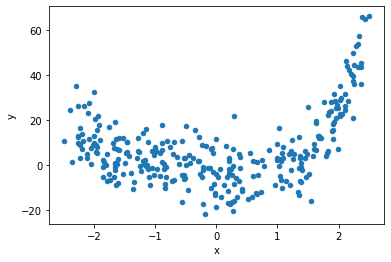

In [30]:
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4 
df = pd.DataFrame({'x': X, 'y': y}) 
df.to_csv('dane_do_regresji.csv',index=None)
df.plot.scatter(x='x',y='y')

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(240,) (240,)
(60,) (60,)


# ***TRAIN SET***

***Linear Regression Train set***


In [33]:
X_b = np.c_[np.ones(X_train.shape), X_train]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
print(theta_best)

[6.43369308 3.524323  ]


In [34]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
print(y_predict := X_new_b.dot(theta_best))

[ 6.43369308 13.48233909]


In [35]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
X_train = X_train.reshape(-1, 1)
lin_reg.fit(X_train, y_train)
print(lin_reg.intercept_, lin_reg.coef_, "\n", lin_reg.predict(X_new))
lin_reg_pred = lin_reg.predict(X_train)

6.43369307864597 [3.524323] 
 [ 6.43369308 13.48233909]


***KNN Train set k=3***

In [36]:
import sklearn.neighbors
knn_3_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
knn_3_reg.fit(X_train.reshape(-1,1), y_train)
print(knn_3_reg.predict(X_new))
knn_3_reg_pred = knn_3_reg.predict(X_train)

[-3.65671472 23.34767591]


***k=5***

In [37]:
knn_5_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
knn_5_reg.fit(X_train.reshape(-1,1), y_train)
print(knn_5_reg.predict(X_new))
knn_5_reg_pred = knn_5_reg.predict(X_train)

[-5.76766295 25.18606351]


***Polynomial Regression Train set***

In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features_2.fit_transform(X_train)
print(X_train[0], X_poly[0])
poly_2_reg = LinearRegression()
poly_2_reg.fit(X_poly, y_train)
print(poly_2_reg.intercept_, poly_2_reg.coef_)
print(poly_2_reg.predict(poly_features_2.fit_transform([[0],[2]])))
print(poly_2_reg.coef_[1] * 2**2 + poly_2_reg.coef_[0] * 2 + poly_2_reg.intercept_)
poly_2_reg_pred = poly_2_reg.predict(X_poly)

[-0.07164697] [-0.07164697  0.00513329]
-5.595077069348042 [3.11059097 6.20859566]
[-5.59507707 25.46048752]
25.460487522621328


In [39]:
poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features_3.fit_transform(X_train)
print(X_train[0], X_poly[0])
poly_3_reg = LinearRegression()
poly_3_reg.fit(X_poly, y_train)
print(poly_3_reg.intercept_, poly_3_reg.coef_)
print(poly_3_reg.predict(poly_features_3.fit_transform([[0],[2]])))
print(poly_3_reg.coef_[2] * 2**3 + poly_3_reg.coef_[1] * 2**2 + poly_3_reg.coef_[0] * 2 + poly_3_reg.intercept_)
poly_3_reg_pred = poly_3_reg.predict(X_poly)

[-0.07164697] [-0.07164697  0.00513329 -0.00036778]
-5.524486914628383 [-4.07902043  6.0053435   2.08957807]
[-5.52448691 27.05547078]
27.05547077704543


In [40]:
poly_features_4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features_4.fit_transform(X_train)
print(X_train[0], X_poly[0])
poly_4_reg = LinearRegression()
poly_4_reg.fit(X_poly, y_train)
print(poly_4_reg.intercept_, poly_4_reg.coef_)
print(poly_4_reg.predict(poly_features_4.fit_transform([[0],[2]])))
print(poly_4_reg.coef_[3] * 2**4 + poly_4_reg.coef_[2] * 2**3 + poly_4_reg.coef_[1] * 2**2 + poly_4_reg.coef_[0] * 2 + poly_4_reg.intercept_)
poly_4_reg_pred = poly_4_reg.predict(X_poly)

[-0.07164697] [-7.16469700e-02  5.13328831e-03 -3.67784553e-04  2.63506489e-05]
-2.817327629779273 [-3.8437271   1.2822925   1.96367146  0.96733301]
[-2.81732763 25.81108807]
25.811088068771333


In [41]:
poly_features_5 = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features_5.fit_transform(X_train)
print(X_train[0], X_poly[0])
poly_5_reg = LinearRegression()
poly_5_reg.fit(X_poly, y_train)
print(poly_5_reg.intercept_, poly_5_reg.coef_)
print(poly_5_reg.predict(poly_features_5.fit_transform([[0],[2]])))
print(poly_5_reg.coef_[4] *2**5 + poly_5_reg.coef_[3] * 2**4 + poly_5_reg.coef_[2] * 2**3 + poly_5_reg.coef_[1] * 2**2 + poly_5_reg.coef_[0] * 2 + poly_5_reg.intercept_)
poly_5_reg_pred = poly_5_reg.predict(X_poly)

[-0.07164697] [-7.16469700e-02  5.13328831e-03 -3.67784553e-04  2.63506489e-05
 -1.88794415e-06]
-2.8266210595076444 [-2.81421304  1.33612443  1.16279879  0.9503664   0.12329551]
[-2.82662106 25.34315941]
25.34315941367116


# ***TEST SET***

***Linear Regression Test set***

In [42]:
X_b = np.c_[np.ones(X_test.shape), X_test]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_test)
print(theta_best)

[9.89291016 4.50010372]


In [43]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
print(y_predict_ := X_new_b.dot(theta_best))

[ 9.89291016 18.8931176 ]


In [44]:
lin_reg = LinearRegression()
X_test = X_test.reshape(-1, 1)
lin_reg.fit(X_test, y_test)
lin_reg.fit(X_test, y_test)
print(lin_reg.intercept_, lin_reg.coef_, "\n", lin_reg.predict(X_new))
lin_reg_pred_t = lin_reg.predict(X_test)

9.892910159759547 [4.50010372] 
 [ 9.89291016 18.8931176 ]


***KNN Test set k=3***

In [45]:
knn_3_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
knn_3_reg.fit(X_test.reshape(-1,1), y_test)
print(knn_3_reg.predict(X_new))
knn_3_reg_pred_t = knn_3_reg.predict(X_test)

[-8.44458442 20.88104301]


***k=5***

In [46]:
knn_5_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
knn_5_reg.fit(X_test.reshape(-1,1), y_test)
print(knn_5_reg.predict(X_new))
knn_5_reg_pred_t = knn_5_reg.predict(X_test)

[-4.377968   24.86353061]


***Polynomial Regression Test set***

In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features_2.fit_transform(X_test.reshape(-1,1))
print(X_test[0], X_poly[0])
poly_2_reg = LinearRegression()
poly_2_reg.fit(X_poly, y_test)
print(poly_2_reg.intercept_, poly_2_reg.coef_)
print(poly_2_reg.predict(poly_features_2.fit_transform([[0],[2]])))
print(poly_2_reg.coef_[1] * 2**2 + poly_2_reg.coef_[0] * 2 + poly_2_reg.intercept_)
poly_2_reg_pred_t = poly_2_reg.predict(X_poly)

[-2.18622518] [-2.18622518  4.77958053]
-6.665367413338174 [3.76594834 6.18308372]
[-6.66536741 25.59886415]
25.598864148816524


In [48]:
poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features_3.fit_transform(X_test.reshape(-1,1))
print(X_test[0], X_poly[0])
poly_3_reg = LinearRegression()
poly_3_reg.fit(X_poly, y_test)
print(poly_3_reg.intercept_, poly_3_reg.coef_)
print(poly_3_reg.predict(poly_features_3.fit_transform([[0],[2]])))
print(poly_3_reg.coef_[2] * 2**3 + poly_3_reg.coef_[1] * 2**2 + poly_3_reg.coef_[0] * 2 + poly_3_reg.intercept_)
poly_3_reg_pred_t = poly_3_reg.predict(X_poly)

[-2.18622518] [ -2.18622518   4.77958053 -10.4492393 ]
-8.209987006748136 [-6.22449493  6.45523244  2.55662755]
[-8.20998701 25.61497327]
25.614973274919187


In [49]:
poly_features = PolynomialFeatures(degree=4, include_bias = False)
X_poly = poly_features.fit_transform(X_test.reshape(-1,1))
print(X_test[0].reshape(-1, 1), X_poly[0])
poly_4_reg = LinearRegression()
poly_4_reg.fit(X_poly, y_test)
print(poly_4_reg.intercept_, poly_4_reg.coef_)
print(poly_4_reg.predict(poly_features.fit_transform([[0],[2]])))
print(poly_4_reg.coef_[1] * 2**2 + poly_4_reg.coef_[0] * 2 + poly_4_reg.intercept_)
poly_4_reg_pred_t = poly_4_reg.predict(X_poly)

[[-2.18622518]] [ -2.18622518   4.77958053 -10.4492393   22.84439005]
-3.066291119020658 [-5.84214221 -0.6672853   2.4509658   1.33874403]
[-3.06629112 23.60791416]
-17.419716731910707


In [50]:
poly_features = PolynomialFeatures(degree=5, include_bias = False)
X_poly = poly_features.fit_transform(X_test.reshape(-1,1))
print(X_test[0].reshape(-1, 1), X_poly[0])
poly_5_reg = LinearRegression()
poly_5_reg.fit(X_poly, y_test)
print(poly_5_reg.intercept_, poly_5_reg.coef_)
print(poly_5_reg.predict(poly_features.fit_transform([[0],[2]])))
print(poly_5_reg.coef_[1] * 2**2 + poly_5_reg.coef_[0] * 2 + poly_5_reg.intercept_)
poly_5_reg_pred_t = poly_5_reg.predict(X_poly)

[[-2.18622518]] [ -2.18622518   4.77958053 -10.4492393   22.84439005 -49.94298071]
-4.137459064579179 [-13.46217314  -0.29180515   7.52665577   1.31107576  -0.72057509]
[-4.13745906 25.90302933]
-32.22902593900544


***DATA FRAME***

In [51]:
from sklearn.metrics import mean_squared_error
mse = {'lin_reg':[mean_squared_error(y_train, lin_reg_pred), mean_squared_error(y_test, lin_reg_pred_t)],
       'knn_3_reg':[mean_squared_error(y_train, knn_3_reg_pred), mean_squared_error(y_test, knn_3_reg_pred_t)],
       'knn_5_reg':[mean_squared_error(y_train, knn_5_reg_pred), mean_squared_error(y_test, knn_5_reg_pred_t)],
       'poly_2_reg':[mean_squared_error(y_train, poly_2_reg_pred), mean_squared_error(y_test, poly_2_reg_pred_t)],
       'poly_3_reg':[mean_squared_error(y_train, poly_3_reg_pred), mean_squared_error(y_test, poly_3_reg_pred_t)],
       'poly_4_reg':[mean_squared_error(y_train, poly_4_reg_pred), mean_squared_error(y_test, poly_4_reg_pred_t)],
       'poly_5_reg':[mean_squared_error(y_train, poly_5_reg_pred), mean_squared_error(y_test, poly_5_reg_pred_t)]}

mse = pd.DataFrame.from_dict(mse, orient = 'index', columns = ['train_mse', 'test_mse'])

In [52]:
mse

,train_mse,test_mse
lin_reg,203.456213,244.710642
knn_3_reg,48.411522,60.735204
knn_5_reg,55.691151,65.997923
poly_2_reg,91.119910,121.558274
poly_3_reg,72.731978,92.229922
poly_4_reg,66.371869,78.443355
poly_5_reg,66.213384,73.806559


In [53]:
import pickle

In [54]:
with open('mse.pkl', 'wb') as f:
    pickle.dump(mse, f)

In [55]:
reg = [(lin_reg, None), (knn_3_reg, None), (knn_5_reg, None), (poly_2_reg, poly_features_2 ), (poly_3_reg, poly_features_3), (poly_4_reg, poly_features_4), (poly_5_reg, poly_features_5)]
with open('reg.pkl', 'wb') as f:
    pickle.dump(reg, f)

In [56]:
reg

[(LinearRegression(), None),
 (KNeighborsRegressor(n_neighbors=3), None),
 (KNeighborsRegressor(), None),
 (LinearRegression(), PolynomialFeatures(include_bias=False)),
 (LinearRegression(), PolynomialFeatures(degree=3, include_bias=False)),
 (LinearRegression(), PolynomialFeatures(degree=4, include_bias=False)),
 (LinearRegression(), PolynomialFeatures(degree=5, include_bias=False))]